<a href="https://colab.research.google.com/github/keivanipchihagh/Intro_To_MachineLearning/blob/master/Models/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Machine Learning from Disaster

### Imports

In [ ]:
import pandas as pd                     # Pandas
from matplotlib import pyplot as plt    # Pyplot
import numpy as np                      # Numpy
import seaborn as sns                   # Seaborn
import keras                            # Keras

### Load datasets

In [ ]:
# Training data
train_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Intro_to_DataScience/main/Titanic%20Machine%20Learning%20from%20Disaster/Datasets/train.csv')

# Test data
test_data = pd.read_csv('https://raw.githubusercontent.com/keivanipchihagh/Intro_to_DataScience/main/Titanic%20Machine%20Learning%20from%20Disaster/Datasets/test.csv')

### Getting familiar

In [ ]:
#train_data.info()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Age Analysis
- Most passangers are approximately 18-40 years old
- Mean age: 29.7
- Most passagers aging 25-30 have not survived (Elders have priority!)

In [ ]:
# Checking age frequency
# train_data['Age'].plot(kind = 'hist', color = 'b')

# Calculating mean
# print('Mean:', train_data['Age'].mean())

# Checking which age priority
graph = sns.FacetGrid(train_data, col = 'Survived')
graph.map(plt.hist, 'Age')

##### Sex Analysis
- Females are most likely to survive

In [ ]:
# Checking sex frequency
# train_data['Sex'].plot(kind = 'hist', color = 'r')

# Check survival
graph = sns.FacetGrid(train_data, col = 'Sex')
graph.map(plt.hist, 'Survived')

### Siblings Analysis

In [ ]:
print(train_data['SibSp'].unique())

graph = sns.FacetGrid(train_data, col = 'SibSp')
graph.map(plt.hist, 'Survived')

### Parch Analysis

In [ ]:
graph = sns.FacetGrid(train_data, col = 'Parch')
graph.map(plt.hist, 'Survived')

### Data manipulation

##### Fixing 'Age' null entries

In [ ]:
# 'Age' mean
train_data_age_mean = train_data['Age'].mean()
test_data_age_mean = test_data['Age'].mean()

# Fill nulls
train_data['Age'].fillna(value = train_data_age_mean, inplace = True)
test_data['Age'].fillna(value = test_data_age_mean, inplace = True)

##### Dropping irrelevant | useless columns

In [ ]:
# Remove the 'Cabin' column due to many null entries
train_data.drop(columns = ['Cabin', 'Name'], inplace = True)
test_data.drop(columns = ['Cabin', 'Name'], inplace = True)

# Remove 'PassengerId', 'Ticket', 'Fare' due to being irrelevant
train_data.drop(columns = ['PassengerId', 'Ticket', 'Fare'], inplace = True)
test_data.drop(columns = ['PassengerId', 'Ticket', 'Fare'], inplace = True)

# Drop NA values of 'Embarked'
train_data.dropna(axis = 0, subset = ['Embarked'], inplace = True)
test_data.dropna(axis = 0, subset = ['Embarked'], inplace = True)

##### Feature engineering

In [ ]:
# Mapping male as 0 | female as 1
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1}).astype(float)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1}).astype(float)

# Mapping embarked stages as S as 0 | C as 1 | Q as 2
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(float)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(float)

### Creating the model

##### Spliting data

In [ ]:
# Training data
train_labels = train_data['Survived'].astype(float)
train_data.drop(columns = ['Survived'], inplace = True)

##### Building the network

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units = 32, activation = keras.activations.relu, input_shape = (len(train_data.columns),)))
model.add(keras.layers.Dense(units = 32, activation = keras.activations.relu))
model.add(keras.layers.Dense(units = 1))
model.compile(optimizer = 'rmsprop', loss = keras.losses.mse, metrics = ['mse', 'accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


##### Training the model

In [ ]:
BATCH_SIZE = 64
EPOCHS = 30
history = model.fit(train_data, train_labels, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = False)

##### Plotting training results

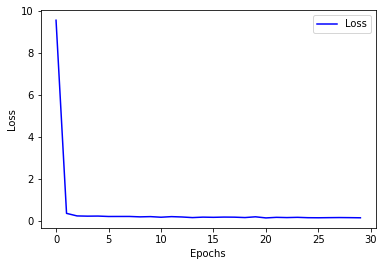

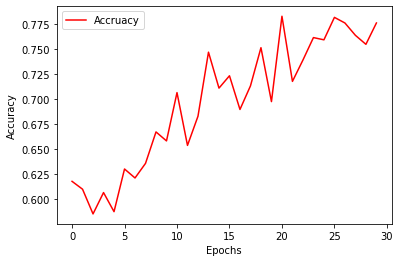

In [ ]:
# Calculate epochs
epochs = range(len(history.history['loss']))

# Plot loss and accuracy
plt.plot(epochs, history.history['loss'], 'b', label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history.history['accuracy'], 'r', label = 'Accruacy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()